<a href="https://colab.research.google.com/github/gavieira/imersao-dados-2-2020/blob/master/Aula03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula03 - Distribuiçoes e correlações entre notas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Setando variáveis

# Criadas na aula01
dados = pd.read_csv("MICRODADOS_ENEM_2019_SAMPLE_43278.csv")
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

# Criadas na aula 02
renda_ordenada = np.sort(dados["Q006"].unique()) 
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Count'>

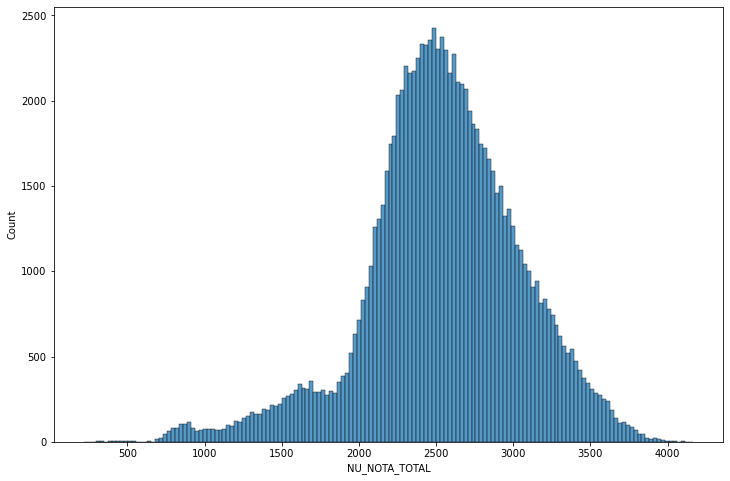

In [11]:
#Histograma do seaborn para as notas cujo total não é 0
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL")
#Parece uma normal
# Mas tem uma barriga antes de chegar no pico
#Será que tem alguma disciplina que está puxando a distribuição das notas totais pra baixo?

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='Count'>

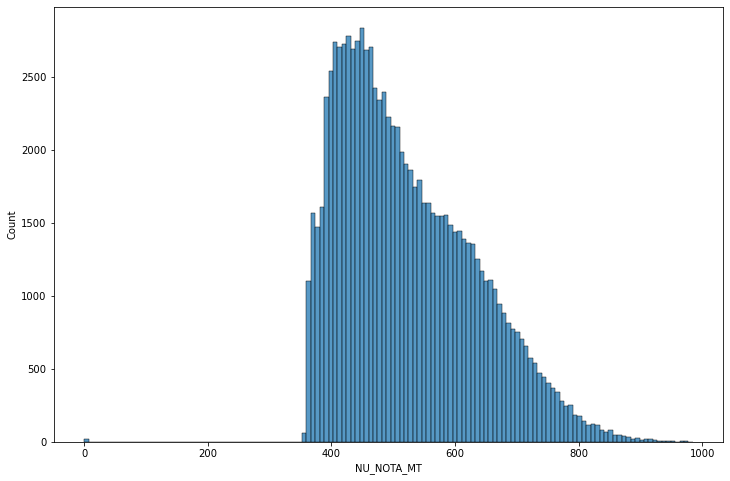

In [24]:
#Analisando a nota de matemática
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_MT")
#Repare que seu comportamento é bem diferente do da nota total. Muita gente com notas mais baixas e depois vai diminuindo à medida que a nota aumenta
#Não parece uma curva normal, é mais assimétrica
#Para além disso, assimétrica à direita
#Esse tipo de distribuição é comum em "medidas sociais", como a renda. Os valores mais baixos são mto mais numerosos que os altos

**OBS:** Distribuições simétricas e assimétricas

![Distribuições](imagens/distrib_assimetrica.jpg)

<AxesSubplot:xlabel='NU_NOTA_LC', ylabel='Count'>

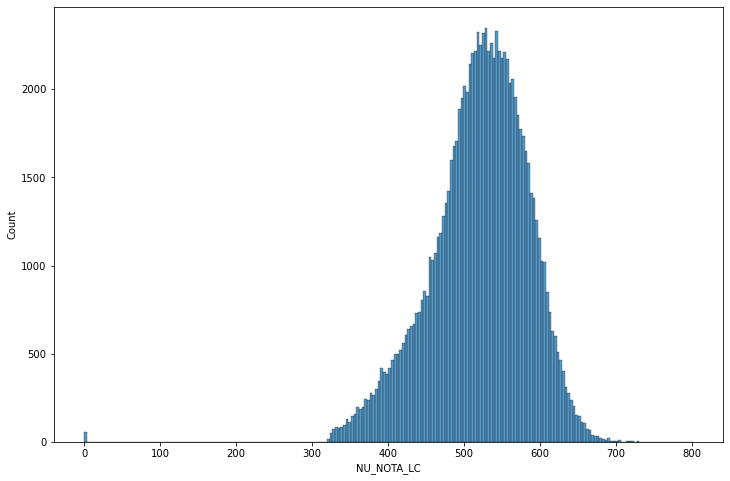

In [16]:
#Plot do histograma da prova de linguagens
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_LC")
#Tem mais cara de assimétrico à esquerda

<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Count'>

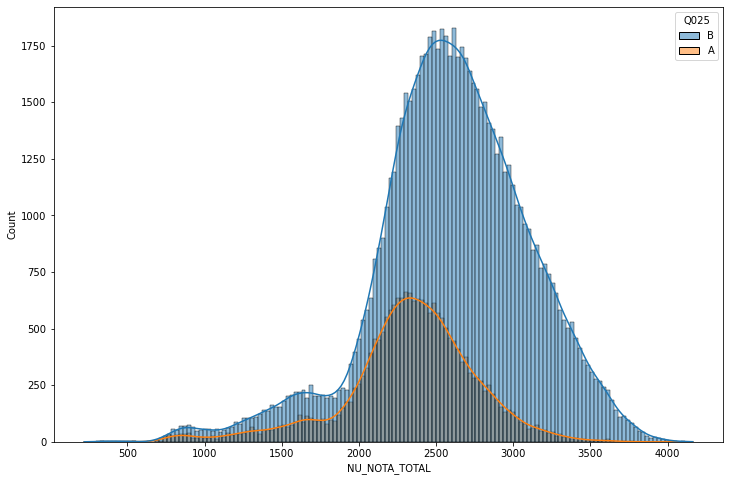

In [20]:
#Fazendo o desafio da aula anterior (comparar nota total dos alunos com internet e sem internet)
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True)
#kde - Função que aproxima essa distribuição, criando uma linha
#Na fração dos dados sem nota 0, as pessoas com maior nota geralmente possuem internet em casa
# Também é justo afirmar que, aparentemente, as pessoas sem internet são minoria nesse gráfico, logo é difícil afirmar qualquer coisa categoricamente

<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Probability'>

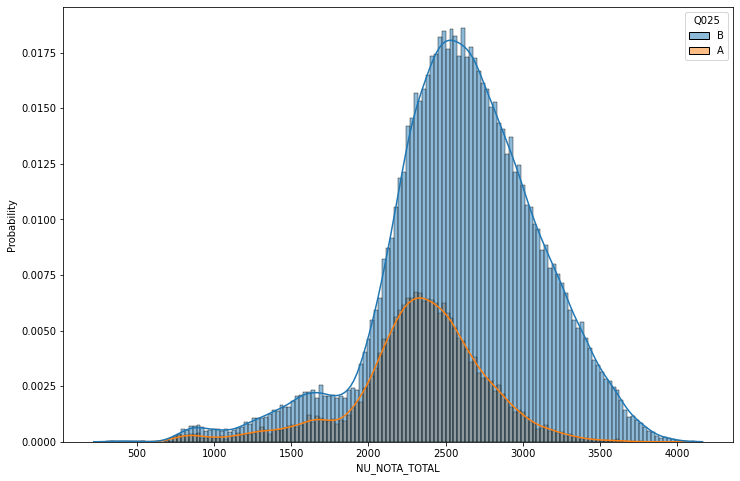

In [21]:
#Count: numero de vezes que ocorre por bin
#Para obter a probabilidade daquele bin, usamos stat="probability"
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="probability")

<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Density'>

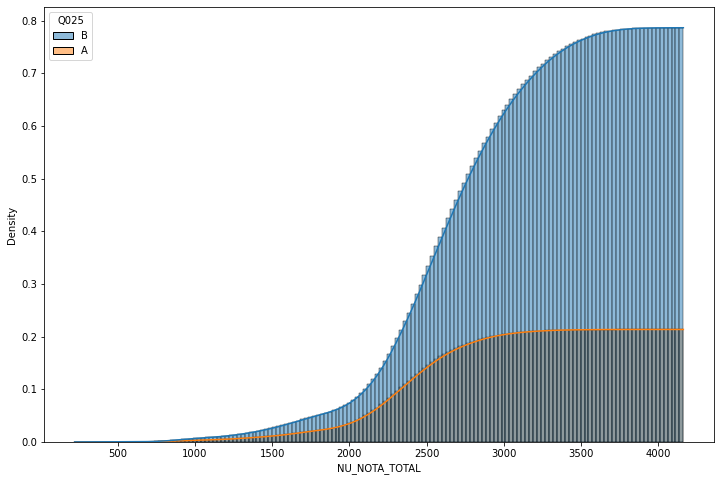

In [26]:
#Com o parametro "cumulative", nós vemos como as pessoas vão se acumulando nessas duas categorias (com e sem internet)
#Distribuição quantitativa - Associada aos quantis (quantas pessoas estão acima ou abaixo de tal valor)
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="density", cumulative=True)

(-50.0, 1050.0)

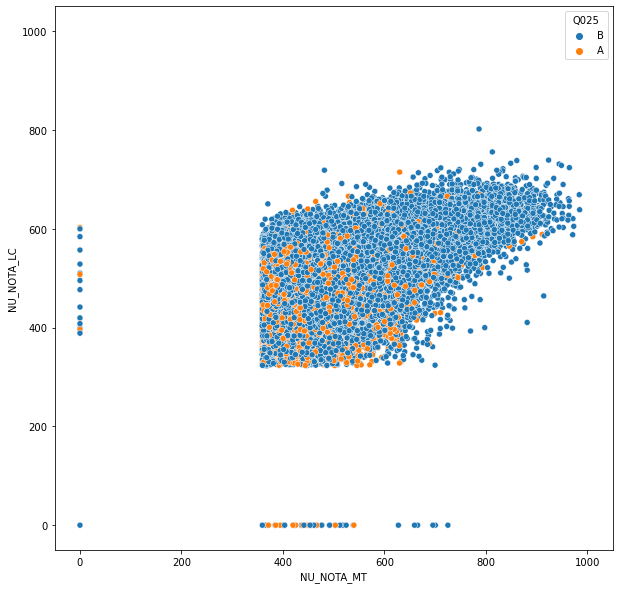

In [34]:
#Até aqui, estávamos olhando as notas separadamenteo
#Mas e se quisermos analisar a relação entre as notas? Analisar uma tendência entre as notas (se elas crescem juntas, se quando uma cresce, a outra diminui...)
#Podemos usar um scatterplot - ótimo para ver correlações
plt.figure(figsize=(10, 10)) #Deixa o gráfico quadrado pra não enviesar nossa interpretação de alugm dos eixos. Dois eixos têm a mesma unidade (vão de 0 a 1000)
sns.scatterplot(data = dados_sem_notas_zero, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="Q025")
plt.xlim((-50, 1050)) # Limitar eixo x (tupla com limites inferior e superior)
plt.ylim((-50, 1050)) # Limitar eixo y
#Pq tem nota 0, se a variavel é dados_sem_notas_zero?
#O dados_sem_notas_zero se refere à nota TOTAL. Alguem pode ter tirado 0 em MT e LC e tirado alguma nota nas outras
#À medida que a nota de linguagem aumentam, a de matemática aumenta tbm. Há uma tendência, uma correlação entre variáveis.
#Quem estudou uma, possivelmente conseguiu estudar a outra. Faz sentido
#Mas no começo, tem um quadrado,um bolão de notas. Ali tem gente tirando todo tipo de notas e a correlação fica beem mais fraca, se é que existe
#Quem tira entre 400 e 600 de MT, tira entre 400 e 600 de LC
# Mas quem tira entre 800 e 1000 em MT não costuma tirar menos de 500 em LC
#Com isso, vemos também que é bem difícil alguém tirar nota altíssima em LC
#Precisamos de menos decoreba e mais interpretação de texto nas escolas
# Tem muitos valores, então fica um pouco poluído msm

In [30]:
provas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_MT',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_TOTAL']

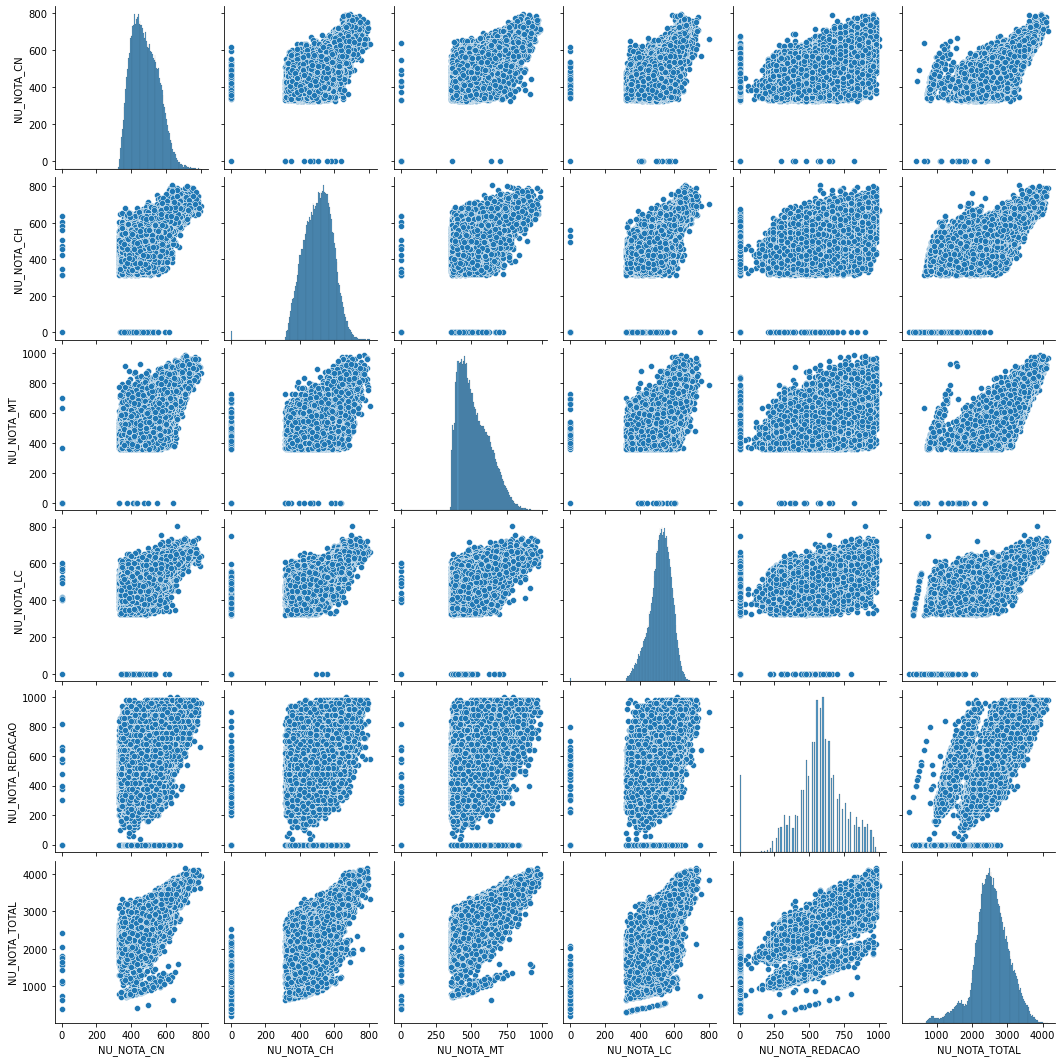

In [31]:
#Como olhar isso para todas as notas?
#Podemos fazer pairplots comparando elas entre si, par a par
sns.pairplot(dados_sem_notas_zero[provas])
#Basicamente, retorna uma matriz de gráficos

In [40]:
#Outra forma de visualizar isso (de forma numérica) é por meio do cálculo da correlação
#Correlação: medida entre -1 e +1
#Quanto mais perto dos extremos: correlação mais forte (negativa ou positiva)
#Quanto mais próximo do 0 (meio): mais fraca a correlação. Menos uma variável tem a ver com a outra
correlacao = dados_sem_notas_zero[provas].corr() #Passa as colunas que quer calcular
correlacao
#As notas que melhor se correlacionam com a nota total são as de matemática e ciencias da natureza
# A que menos correlaciona é Linguagens
# Maior correlação entre as notas: CH e LC
#Falta interpretação de texto nas escolas, tanto públicas quanto privadas

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740,0.785600
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338,0.735534
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046,0.790051
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797,0.711686
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000,0.783647
NU_NOTA_TOTAL,0.785600,0.735534,0.790051,0.711686,0.783647,1.000000


OBS: Correlação

[![Pearson Correlation](imagens/correlation.png)](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

Na segunda linha, independentemente do quão proporcionais as variáveis são (inclinação da linha), a correlação é forte.

Correlação é fraca quando os pontos estão muito espalhados (como é o caso da terceira linha, onde os pontos inclusives apresentam simetria).

Ultima linha: Quando tem bordas, há alguma restrição abrupta (e.g. tamanho), e dentro disso a distribuição dos pontos é aletória. Quando não há restrição e é aleatório,fica mais parecido com o último gráfico da terceira linha... Mas esses casos são bem incomuns de observamos na vida real...

<AxesSubplot:>

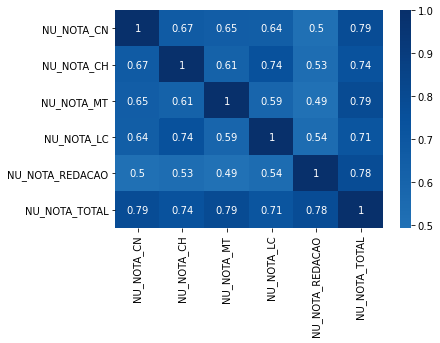

In [41]:
#Para melhorar ainda mais a visualização, podemos fazer um heatmap
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True)
#center=0 - O centro da paleta de cores fica valor zero

Desafio: Plotar as médias, medianas e moda nas notas de LC e MT (matiplotlib linha vertical)

Desafio2: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente. Procurar "correlation matrix seaborn" no Google

Desafio3: Filtrar as notas por seu estado ou sua cidade e refazer as análises, verificando se são semelhantes ao geral.

Desafio4: Pensar sobre a correlação entre matemática e Linguagens.

Linguagens têm muito a ver com interpretação de texto, e mesmo na matemática precisamos saber interpretar o que nos é pedido....

A linguagem pode ajudar a matemática, mas o contrário não parece provável...

Desafio5: Plotar um scatterplot ou histograma que mostra o salário por sexo (imagino que os microdados têm essa informação)